# 🎯 **Feature Engineering Opportunities Identified**  

---

## 🔢 **1. Numerical Features**  
💰 **Income & Loan Amount**  
- 📊 Show right skewness → **Apply log transformation** for normalization  
- 📉 High variance? → **Use Standardization (Z-score) or MinMax Scaling**  

📉 **Credit Score**  
- 🚨 Contains outliers → **Apply binning or normalization**  
- 🔍 Investigate correlation with default rate → **Create risk segmentation**  

👷 **Employment Length**  
- ❌ Missing values → **Impute using median or predictive modeling**  
- 📅 Consider grouping → **Short, Medium, Long-term employment categories**  

---

## 🏷️ **2. Categorical Features**  
🎓 **Education**  
- 🔗 Strong relationship with default → **Apply ordinal encoding**  
- 📉 Merge low-frequency categories for better generalization  

🌍 **City**  
- 🏙️ High cardinality → **Use dimensionality reduction techniques (Target Encoding, PCA, Frequency Encoding)**  

💼 **Occupation**  
- 👥 Cluster similar occupations → **Reduce granularity**  
- 💰 Check correlation with income & loan amount  

---

## ⏳ **3. Temporal Features**  
📅 **Monthly Default Patterns**  
- 🔄 **Cyclical encoding** → Use **sine/cosine transformations** for months  
- 📈 Check for **seasonal trends in default rates**  

📆 **Application Recency**  
- 🕒 Newer applications may behave differently → **Create a `days_since_application` feature**  

📊 **Economic Cycles**  
- 📉 Consider **macroeconomic indicators** (e.g., inflation, interest rates) → **Integrate external data**  

---

## 🤝 **4. Potential Interactions**  
💸 **Income & Education**  
- 🏆 **Income-to-education ratio** → How salary varies with degree level  

🏦 **Loan Amount & Income**  
- 📊 **Loan-to-income ratio** → Helps identify high financial burden cases  

💳 **Credit Score & Income**  
- 🔥 **Create risk segments** using both **credit score & income**  

📜 **Loan Term & Interest Rate**  
- 🔍 Analyze relationship → Longer loan terms **correlate with higher interest rates?**  

---

## 🔥 **Bonus Feature Ideas**  
🔍 **Investigate Default Rate by Job Stability**  
- 📅 How does **employment length vs. occupation type** affect defaults?  

🌎 **Geographical Clusters**  
- 🗺️ Use city data to create **regional credit risk segments**  

📈 **Non-Linear Feature Engineering**  
- 🔄 Consider **polynomial features** for complex relationships in loan vs. default rate  

---

🚀 **Next Steps?**  
- ✅ **Prioritize features** with highest predictive power  
- 🔄 **Test transformations & interactions** in baseline ML models  
- 📊 **Analyze feature importance** after model training  

---

# 📌 Import necessary libraries for data analysis and preprocessing


In [1]:
# 📌 Import necessary libraries for data analysis and preprocessing
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Statistical data visualization

# Imputation and preprocessing from sklearn
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Feature scaling

# 📌 Load the dataset
df = pd.read_csv('loan_applications.csv')  # Read the dataset from CSV file

# 📌 Analyze missing values in the dataset
missing_values = df.isnull().sum()  # Count the number of missing values per column
missing_percentages = (missing_values / len(df)) * 100  # Convert to percentage

# 📌 Print missing values summary
print("📊 Missing Values Analysis:")
print("---------------------------------")
for column, percentage in missing_percentages[missing_percentages > 0].items():
    print(f"🔹 {column}: {percentage:.2f}% missing")  # Display only columns with missing values

# 🔥 Observations:
# - 'employment_length' has the highest percentage of missing values (~14.32%).
# - 'income', 'credit_score', and 'existing_loans' have missing values in the range of 4-5%.
# - Handling these missing values appropriately is crucial for maintaining data quality.

📊 Missing Values Analysis:
---------------------------------
🔹 employment_length: 14.32% missing
🔹 income: 4.89% missing
🔹 credit_score: 5.16% missing
🔹 existing_loans: 5.03% missing


# 📊 Visualizing Missing Value Patterns in the Dataset

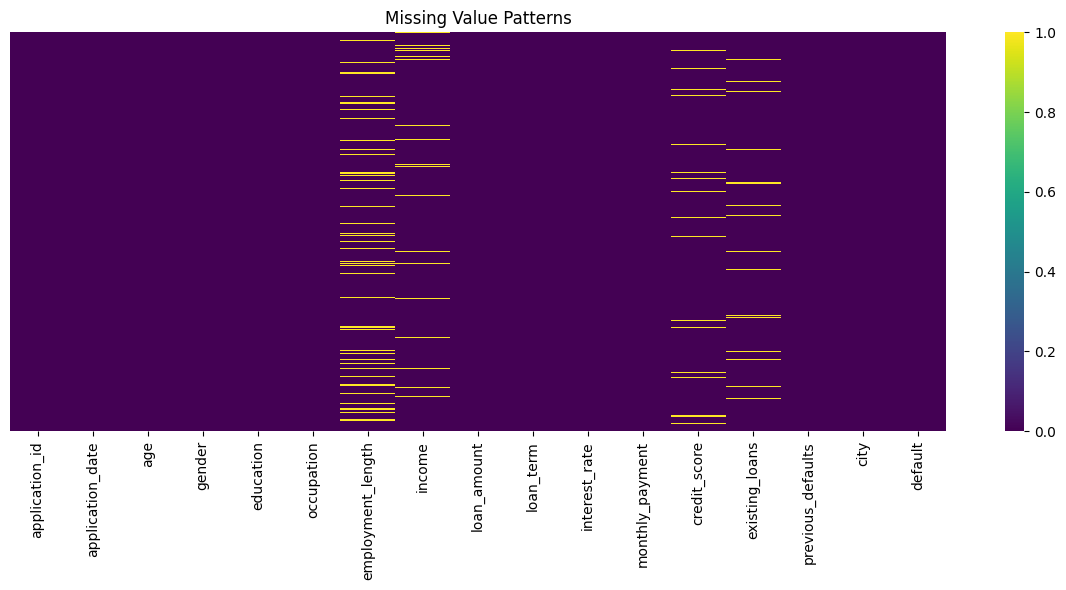

In [2]:
# 📊 Visualizing Missing Value Patterns in the Dataset

# Increase figure size for better readability
plt.figure(figsize=(12, 6))

# Create a heatmap to highlight missing values
# - df.isnull() creates a boolean mask where True = Missing, False = Present
# - yticklabels=False removes row labels to avoid clutter
# - cbar=True displays a color bar for reference
# - cmap='viridis' applies a colormap for better visualization
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')

# Add a title to the plot
plt.title('Missing Value Patterns')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the heatmap
plt.show()

# 🎨 Library for visualizing missing values

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


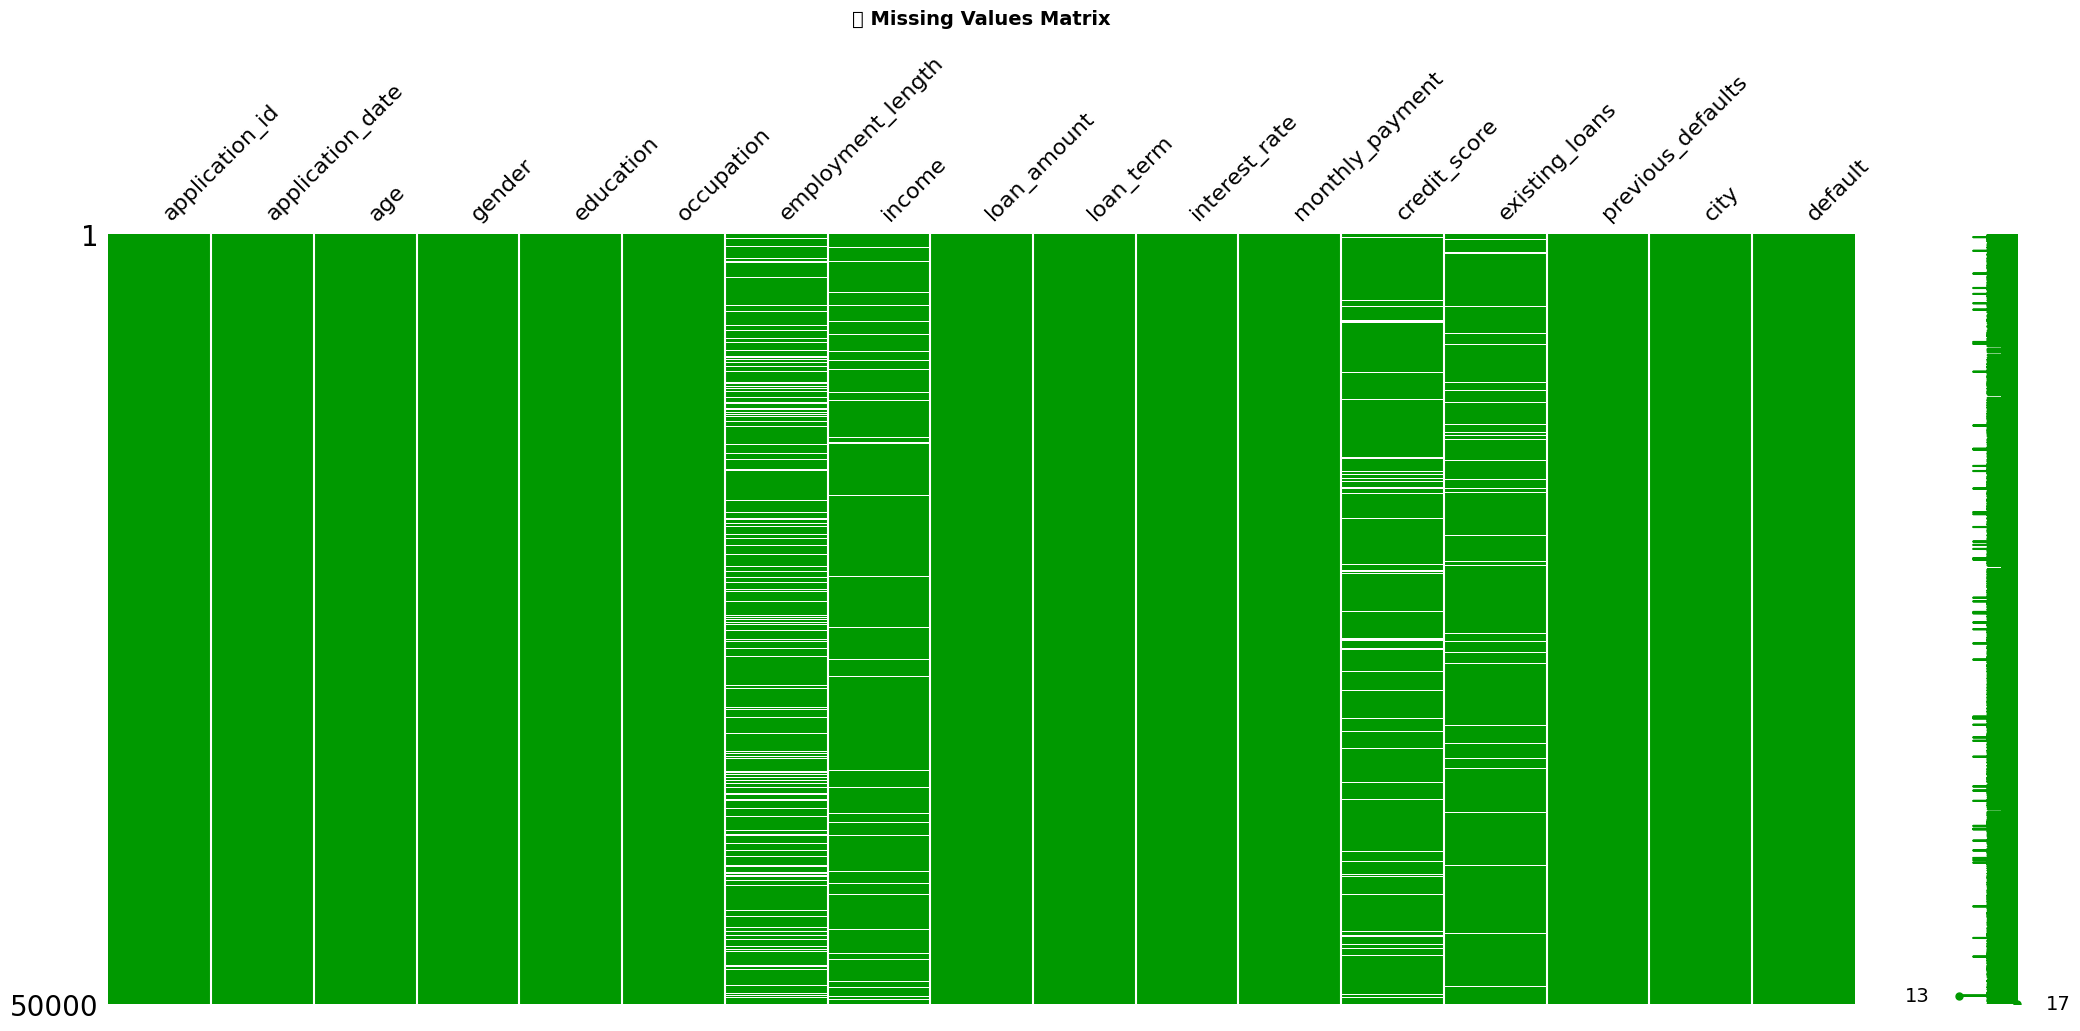

In [3]:
# 📌 Import necessary libraries
import missingno as msno  # Library for visualizing missing values
import matplotlib.pyplot as plt  # Visualization library

# 🎨 Generate an enhanced missing value matrix with custom colors
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
msno.matrix(df,
            sparkline=True,  # Adds a small "sparkline" for missing value trends
            #color=(0.2, 0.4, 0.8))  # Set a custom blue color for better visibility
            color=(0, 0.6, 0))  # Green
            #color=(0, 0, 0.8))  # Dark blue
            #color=(0.5, 0, 0.5))  # Purple
# 🏷 Add a clear and bold title to the plot
plt.title("🔍 Missing Values Matrix", fontsize=14, fontweight="bold", pad=20)

# 🚀 Display the plot
plt.show()

# 📌 Create a copy of the dataset for cleaning to preserve the original data


In [5]:
# 📌 Create a copy of the dataset for cleaning to preserve the original data
df_cleaned = df.copy()

# 🛠️ 1. Handle missing values in the 'employment_length' column
# 🔹 Strategy: Use the median employment length for each education level
#    - This helps maintain realistic values instead of using a global median
#    - Different education levels may have different career lengths, so grouping improves accuracy
#    - Prevents bias that could arise from an overall dataset-wide median

In [6]:
print("\n📊 Median employment length by education level:")
print(df_cleaned.groupby('education')['employment_length'].median())

# 🛠 Fill missing values using group-based median (fixed version using `transform()`)
df_cleaned['employment_length'] = df_cleaned.groupby('education')['employment_length'].transform(lambda x: x.fillna(x.median()))

# ✅ Check if missing values were handled correctly
print("\n✅ Missing values in 'employment_length' after imputation:", df_cleaned['employment_length'].isnull().sum())


📊 Median employment length by education level:
education
Bachelor       7.970018
High School    7.952542
Master         8.036012
Other          8.181292
PhD            7.941047
Name: employment_length, dtype: float64

✅ Missing values in 'employment_length' after imputation: 0


# 📌 1. Handle missing values in the 'employment_length' column

In [7]:
# 📌 1. Handle missing values in the 'employment_length' column
# 🔹 Strategy: Use the median employment length for each education level
# - This ensures realistic values instead of using a global median.
# - Different education levels correlate with different career lengths.
# - Reduces bias compared to using an overall dataset-wide median.

for education in df['education'].unique():
    mask = df_cleaned['education'] == education  # Create a mask for the specific education level
    median_emp_length = df_cleaned.loc[mask, 'employment_length'].median()  # Calculate median
    # Fill missing values only for rows with NaN in 'employment_length'
    df_cleaned.loc[mask & df_cleaned['employment_length'].isnull(), 'employment_length'] = median_emp_length

In [8]:
# 📌 2. Handle missing values in the 'income' column
# 🔹 Strategy: Use a more advanced imputation based on both 'education' and 'occupation'
# - This ensures that income is estimated in a way that reflects real-world salary distributions.

# 🎯 Print median income for different groups before imputation
print("\n📊 Median income by education and occupation:")
print(df.groupby(['education', 'occupation'])['income'].median().head())

# 🔄 Iterate through each unique combination of 'education' and 'occupation'
for (edu, occ) in df.groupby(['education', 'occupation']).groups:
    mask = (df_cleaned['education'] == edu) & (df_cleaned['occupation'] == occ)  # Filter dataset
    median_income = df_cleaned.loc[mask, 'income'].median()  # Compute median income
    # Fill missing values in 'income' using the calculated median per group
    df_cleaned.loc[mask & df_cleaned['income'].isnull(), 'income'] = median_income


📊 Median income by education and occupation:
education  occupation   
Bachelor   Business         50463.64
           Retired          25748.04
           Salaried         36141.72
           Self-employed    42693.90
           Student          11121.33
Name: income, dtype: float64


# 📌 3. Handle missing values in the 'credit_score' column

In [9]:
# 📌 3. Handle missing values in the 'credit_score' column
# 🔹 Strategy: Use a simple imputer with the median strategy
# - The median is used instead of the mean to prevent outlier influence.
# - This approach is commonly used for numerical data imputation.

from sklearn.impute import SimpleImputer  # Importing imputer for missing values

credit_imputer = SimpleImputer(strategy='median')  # Define imputer using median strategy
df_cleaned['credit_score'] = credit_imputer.fit_transform(  # Apply imputation
    df_cleaned[['credit_score']]  # Ensure input is 2D for the imputer
)


In [10]:
# 📌 4. Handle missing values in the 'existing_loans' column
# 🔹 Strategy: Fill missing values with 0 (assumption: no loans if not specified)
# - If 'existing_loans' is NaN, it is assumed the person has no previous loans.
# - This is a domain-specific assumption that depends on the dataset context.

df_cleaned['existing_loans'] = df_cleaned['existing_loans'].fillna(0)  # Replace NaN with 0

In [11]:
# ✅ Check if all missing values are handled
remaining_missing = df_cleaned.isnull().sum()  # Count remaining NaN values
print("\n✅ Remaining missing values after imputation:")
print(remaining_missing[remaining_missing > 0])  # Display only columns with missing values


✅ Remaining missing values after imputation:
Series([], dtype: int64)


# ✅ Validate imputation results with KDE comparison

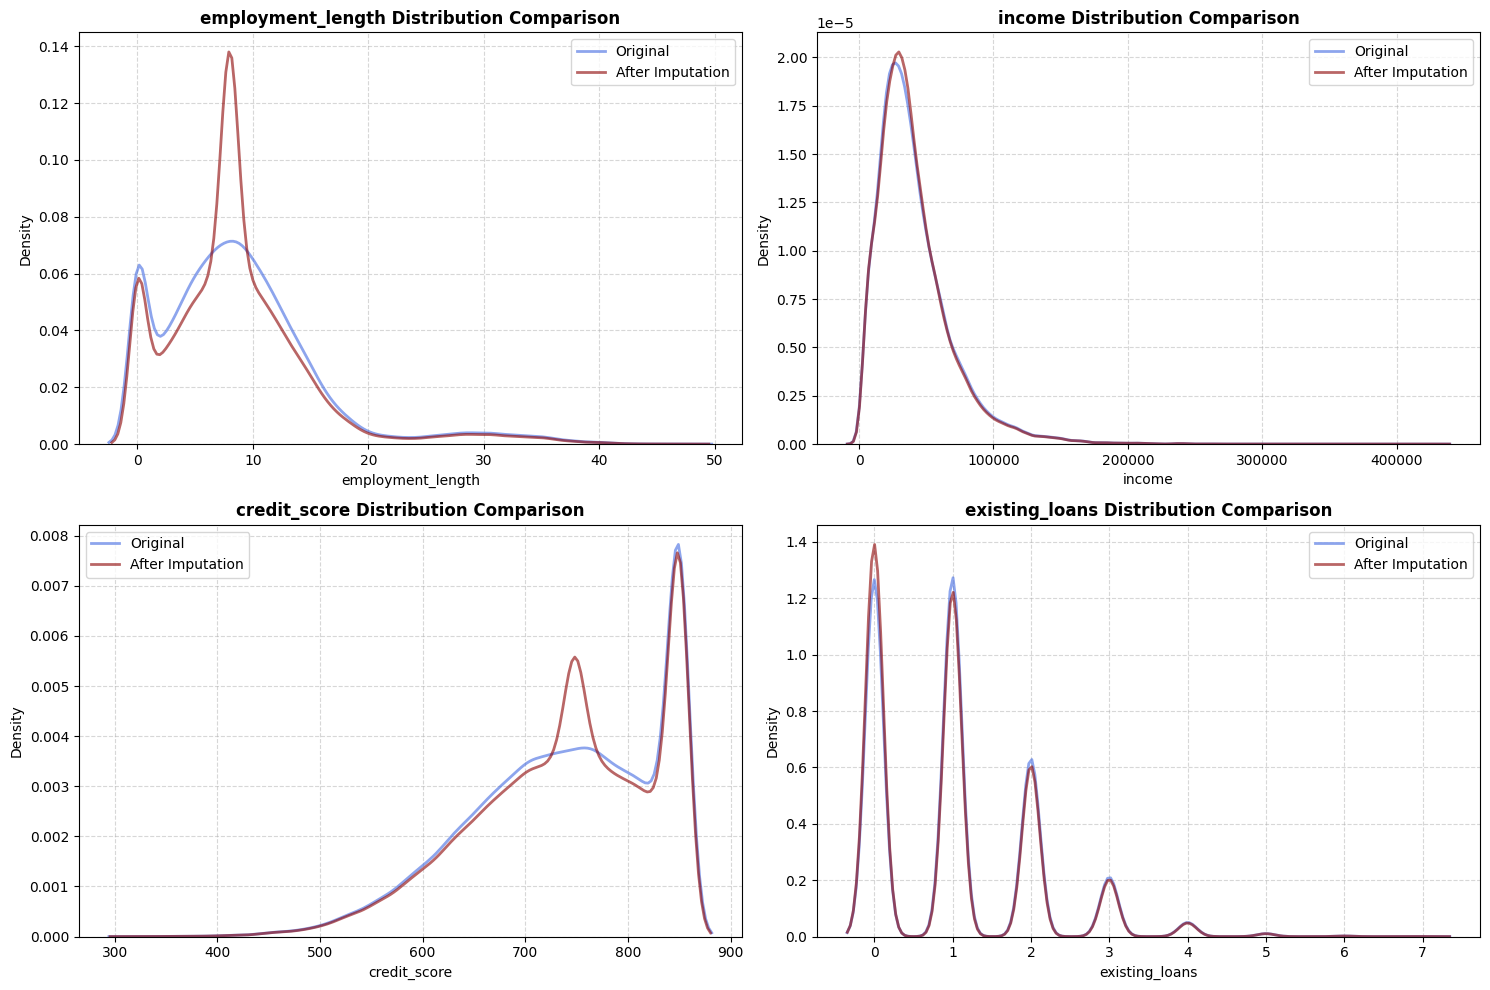

In [12]:
# ✅ Validate imputation results with KDE comparison
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Create a 2x2 subplot grid for comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=False, sharey=False)

# 🔍 Define key features to validate after imputation
features_to_validate = ['employment_length', 'income', 'credit_score', 'existing_loans']

# 🎨 Define distinct colors for better contrast
colors = {'Original': 'royalblue', 'After Imputation': 'darkred'}

# 🚀 Iterate through features and generate KDE plots
for i, feature in enumerate(features_to_validate):
    ax = axes[i // 2, i % 2]  # Select subplot position

    # 🎯 Plot original distribution (before imputation)
    sns.kdeplot(data=df[feature].dropna(), ax=ax, label='Original',
                color=colors['Original'], alpha=0.6, linewidth=2, common_norm=False)

    # 🎯 Plot imputed distribution (after imputation)
    sns.kdeplot(data=df_cleaned[feature], ax=ax, label='After Imputation',
                color=colors['After Imputation'], alpha=0.6, linewidth=2, common_norm=False)

    # 🏷 Add title and labels for better readability
    ax.set_title(f"{feature} Distribution Comparison", fontsize=12, fontweight="bold")
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Density", fontsize=10)

    # 📌 Enable grid for better readability
    ax.grid(True, linestyle="--", alpha=0.5)

    # 📎 Show legend
    ax.legend()

# 🔧 Adjust layout for a better visual representation
plt.tight_layout()

# 🚀 Display the improved plot
plt.show()

# 🔥 Summary of Lecture 3: Handling Missing Values and Data Imputation

---

## 📌 Key Topics Covered

### 1️⃣ Identifying Missing Values  
- Used `df.isnull().sum()` to check for missing values in the dataset.  
- Visualized missing data using **heatmaps (Seaborn)** and **Missingno (`msno.matrix()`)**.

### 2️⃣ Handling Missing Values Strategically  
- **Employment Length** → Imputed using **median per education level** to ensure realistic values.  
- **Income** → Used **grouped median imputation by education & occupation** for more accuracy.  
- **Credit Score** → Applied **SimpleImputer (median strategy)** for numeric values.  
- **Existing Loans** → Assumed missing values meant **no existing loans (filled with 0)**.

### 3️⃣ Validating Data After Imputation  
- **Kernel Density Estimation (KDE) plots** used to compare original vs imputed distributions.  
- Added **grid lines, improved colors, and clear legends** for professional visualization.  

---

## 🚀 Key Takeaways
✔ **Data imputation should be context-aware!** Using group-based medians avoids bias.  
✔ **Different variables need different approaches!** No universal method fits all data types.  
✔ **Always validate imputations visually!** KDE plots reveal distortions in data distribution.  

---

## 🔥 What Can Be Improved?
🔹 **Try multiple imputation techniques** (KNN Imputer, IterativeImputer, etc.).  
🔹 **Test model performance before & after imputation** to see its real impact.  
🔹 **Consider domain knowledge!** Some missing values might have meaning (e.g., zero loans).  

---

## 💡 Next Steps?  
- **Outlier Detection & Handling** (IQR method, Z-score filtering, etc.).  
- **Feature Engineering** (creating new meaningful features).  
- **Preparing Data for ML Models** (scaling, encoding, transformations).  

---

🔥 **Final Thought:** *"Data Cleaning is 80% of Data Science. Do it right, and your models will thank you!"* 😎